<a href="https://colab.research.google.com/github/ManasVardhan/ANN_notebooks/blob/master/Cats_and_Dogs_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the dataset


In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-03-25 15:51:55--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.9.208, 172.217.164.144, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.9.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   118MB/s    in 0.6s    

2021-03-25 15:51:56 (118 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
!unzip /tmp/cats_and_dogs_filtered.zip

Archive:  /tmp/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.

In [3]:
!ls /tmp/

cats_and_dogs_filtered.zip
dap_multiplexer.4dcda60b4be3.root.log.INFO.20210325-155128.47
dap_multiplexer.INFO
debugger_9vn02stio
initgoogle_syslog_dir.0


# Creating a dataset with keras pre-processing libraries

In [4]:
train_dir = '/content/cats_and_dogs_filtered/train'
validation_dir = '/content/cats_and_dogs_filtered/validation'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Instantiating the data generators and sescaling the image 
train_data = ImageDataGenerator( rescale = 1.0/255. )
test_data  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_data.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(300,300))
validation_generator =  test_data.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (300,300))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Creating a model

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

# Compiling and fitting the model with data

In [15]:
from tensorflow.keras.optimizers import RMSprop

In [16]:
model.compile(optimizer=RMSprop(lr=0.001),loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50
                              )

Epoch 1/15
100/100 [==============================] - 15s 141ms/step - loss: 2.3733 - accuracy: 0.5315 - val_loss: 0.6790 - val_accuracy: 0.6520
Epoch 2/15
100/100 [==============================] - 14s 139ms/step - loss: 0.7362 - accuracy: 0.6028 - val_loss: 0.6651 - val_accuracy: 0.6580
Epoch 3/15
100/100 [==============================] - 14s 136ms/step - loss: 0.6353 - accuracy: 0.6716 - val_loss: 0.6390 - val_accuracy: 0.6730
Epoch 4/15
100/100 [==============================] - 14s 136ms/step - loss: 0.5195 - accuracy: 0.7774 - val_loss: 0.9294 - val_accuracy: 0.5650
Epoch 5/15
100/100 [==============================] - 14s 136ms/step - loss: 0.3322 - accuracy: 0.8564 - val_loss: 1.1557 - val_accuracy: 0.6240
Epoch 6/15
100/100 [==============================] - 14s 138ms/step - loss: 0.2272 - accuracy: 0.9026 - val_loss: 1.1292 - val_accuracy: 0.6640
Epoch 7/15
100/100 [==============================] - 14s 137ms/step - loss: 0.1430 - accuracy: 0.9533 - val_loss: 1.6263 - val_ac

# Plotting the training process

In [22]:
import matplotlib.pyplot as plt

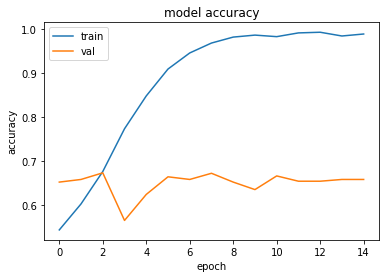

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

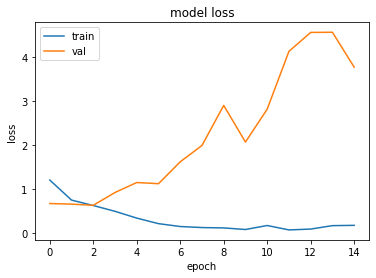

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Adding Augmentation to the images

In [6]:
train_dir = '/content/cats_and_dogs_filtered/train'
validation_dir = '/content/cats_and_dogs_filtered/validation'

In [9]:
augmented_train_data = ImageDataGenerator(rescale = 1./255,
                                          rotation_range = 40,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          shear_range  = 0.2,
                                          zoom_range = 0.2,
                                          horizontal_flip = True,
                                          fill_mode = 'nearest')


In [19]:
augmented_train_generator = augmented_train_data.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(300,300))

Found 2000 images belonging to 2 classes.


In [21]:
history = history = model.fit(augmented_train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_steps=50
                              )

Epoch 1/100
100/100 [==============================] - 46s 460ms/step - loss: 1.3439 - accuracy: 0.5175 - val_loss: 0.6981 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 46s 459ms/step - loss: 0.7461 - accuracy: 0.5315 - val_loss: 0.6651 - val_accuracy: 0.5910
Epoch 3/100
100/100 [==============================] - 46s 455ms/step - loss: 0.7136 - accuracy: 0.5795 - val_loss: 0.6886 - val_accuracy: 0.5240
Epoch 4/100
100/100 [==============================] - 46s 457ms/step - loss: 0.6905 - accuracy: 0.5980 - val_loss: 0.6316 - val_accuracy: 0.6600
Epoch 5/100
100/100 [==============================] - 46s 455ms/step - loss: 0.6748 - accuracy: 0.6170 - val_loss: 0.6310 - val_accuracy: 0.6100
Epoch 6/100
100/100 [==============================] - 46s 455ms/step - loss: 0.6533 - accuracy: 0.6495 - val_loss: 0.6410 - val_accuracy: 0.6040
Epoch 7/100
100/100 [==============================] - 45s 454ms/step - loss: 0.6350 - accuracy: 0.6490 - val_loss: 0.5704 -

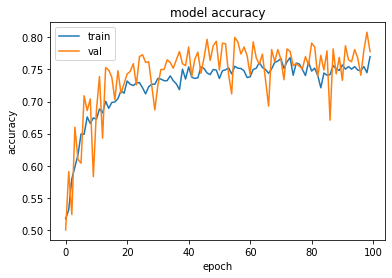

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

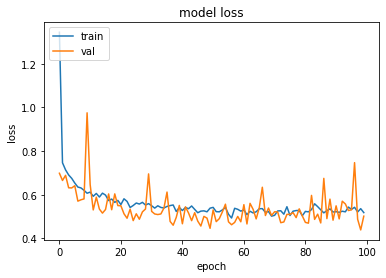

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()